In [51]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
nifty100_data = pd.read_csv('Nifty100_Narrow_Range_7.csv')
nifty100_data

,date,symbol,marketcapname,sector
0,09-02-2024,ONGC,Largecap,Oils
1,09-02-2024,TORNTPHARM,Largecap,Pharmaceuticals
2,09-02-2024,AMBUJACEM,Largecap,Industrials
3,09-02-2024,IRCTC,Largecap,Miscellaneous
4,09-02-2024,HCLTECH,Largecap,I.T
...,...,...,...,...
1432,30-09-2024,TATACONSUM,Largecap,FMCG
1433,30-09-2024,SHRIRAMFIN,Largecap,Finance
1434,01-10-2024,CHOLAFIN,Largecap,Finance
1435,01-10-2024,ULTRACEMCO,Largecap,Industrials


# Stock-wise Trend Analysis

### Data Time Frame:
- Market data is from **February 9, 2024** to **October 1, 2024**.

## Potential Insights from Stock-wise Occurrence Analysis:
1. Most Frequent NR7 Stocks: Identify stocks that frequently exhibit NR7 patterns, suggesting they might be in consolidation phases.
2. Underrepresented Stocks: Determine stocks that show few or no NR7 occurrences, which might indicate trends or volatility.
3. Comparison of Stock Activity: Compare the activity across different stocks, which may help identify opportunities in less obvious places.



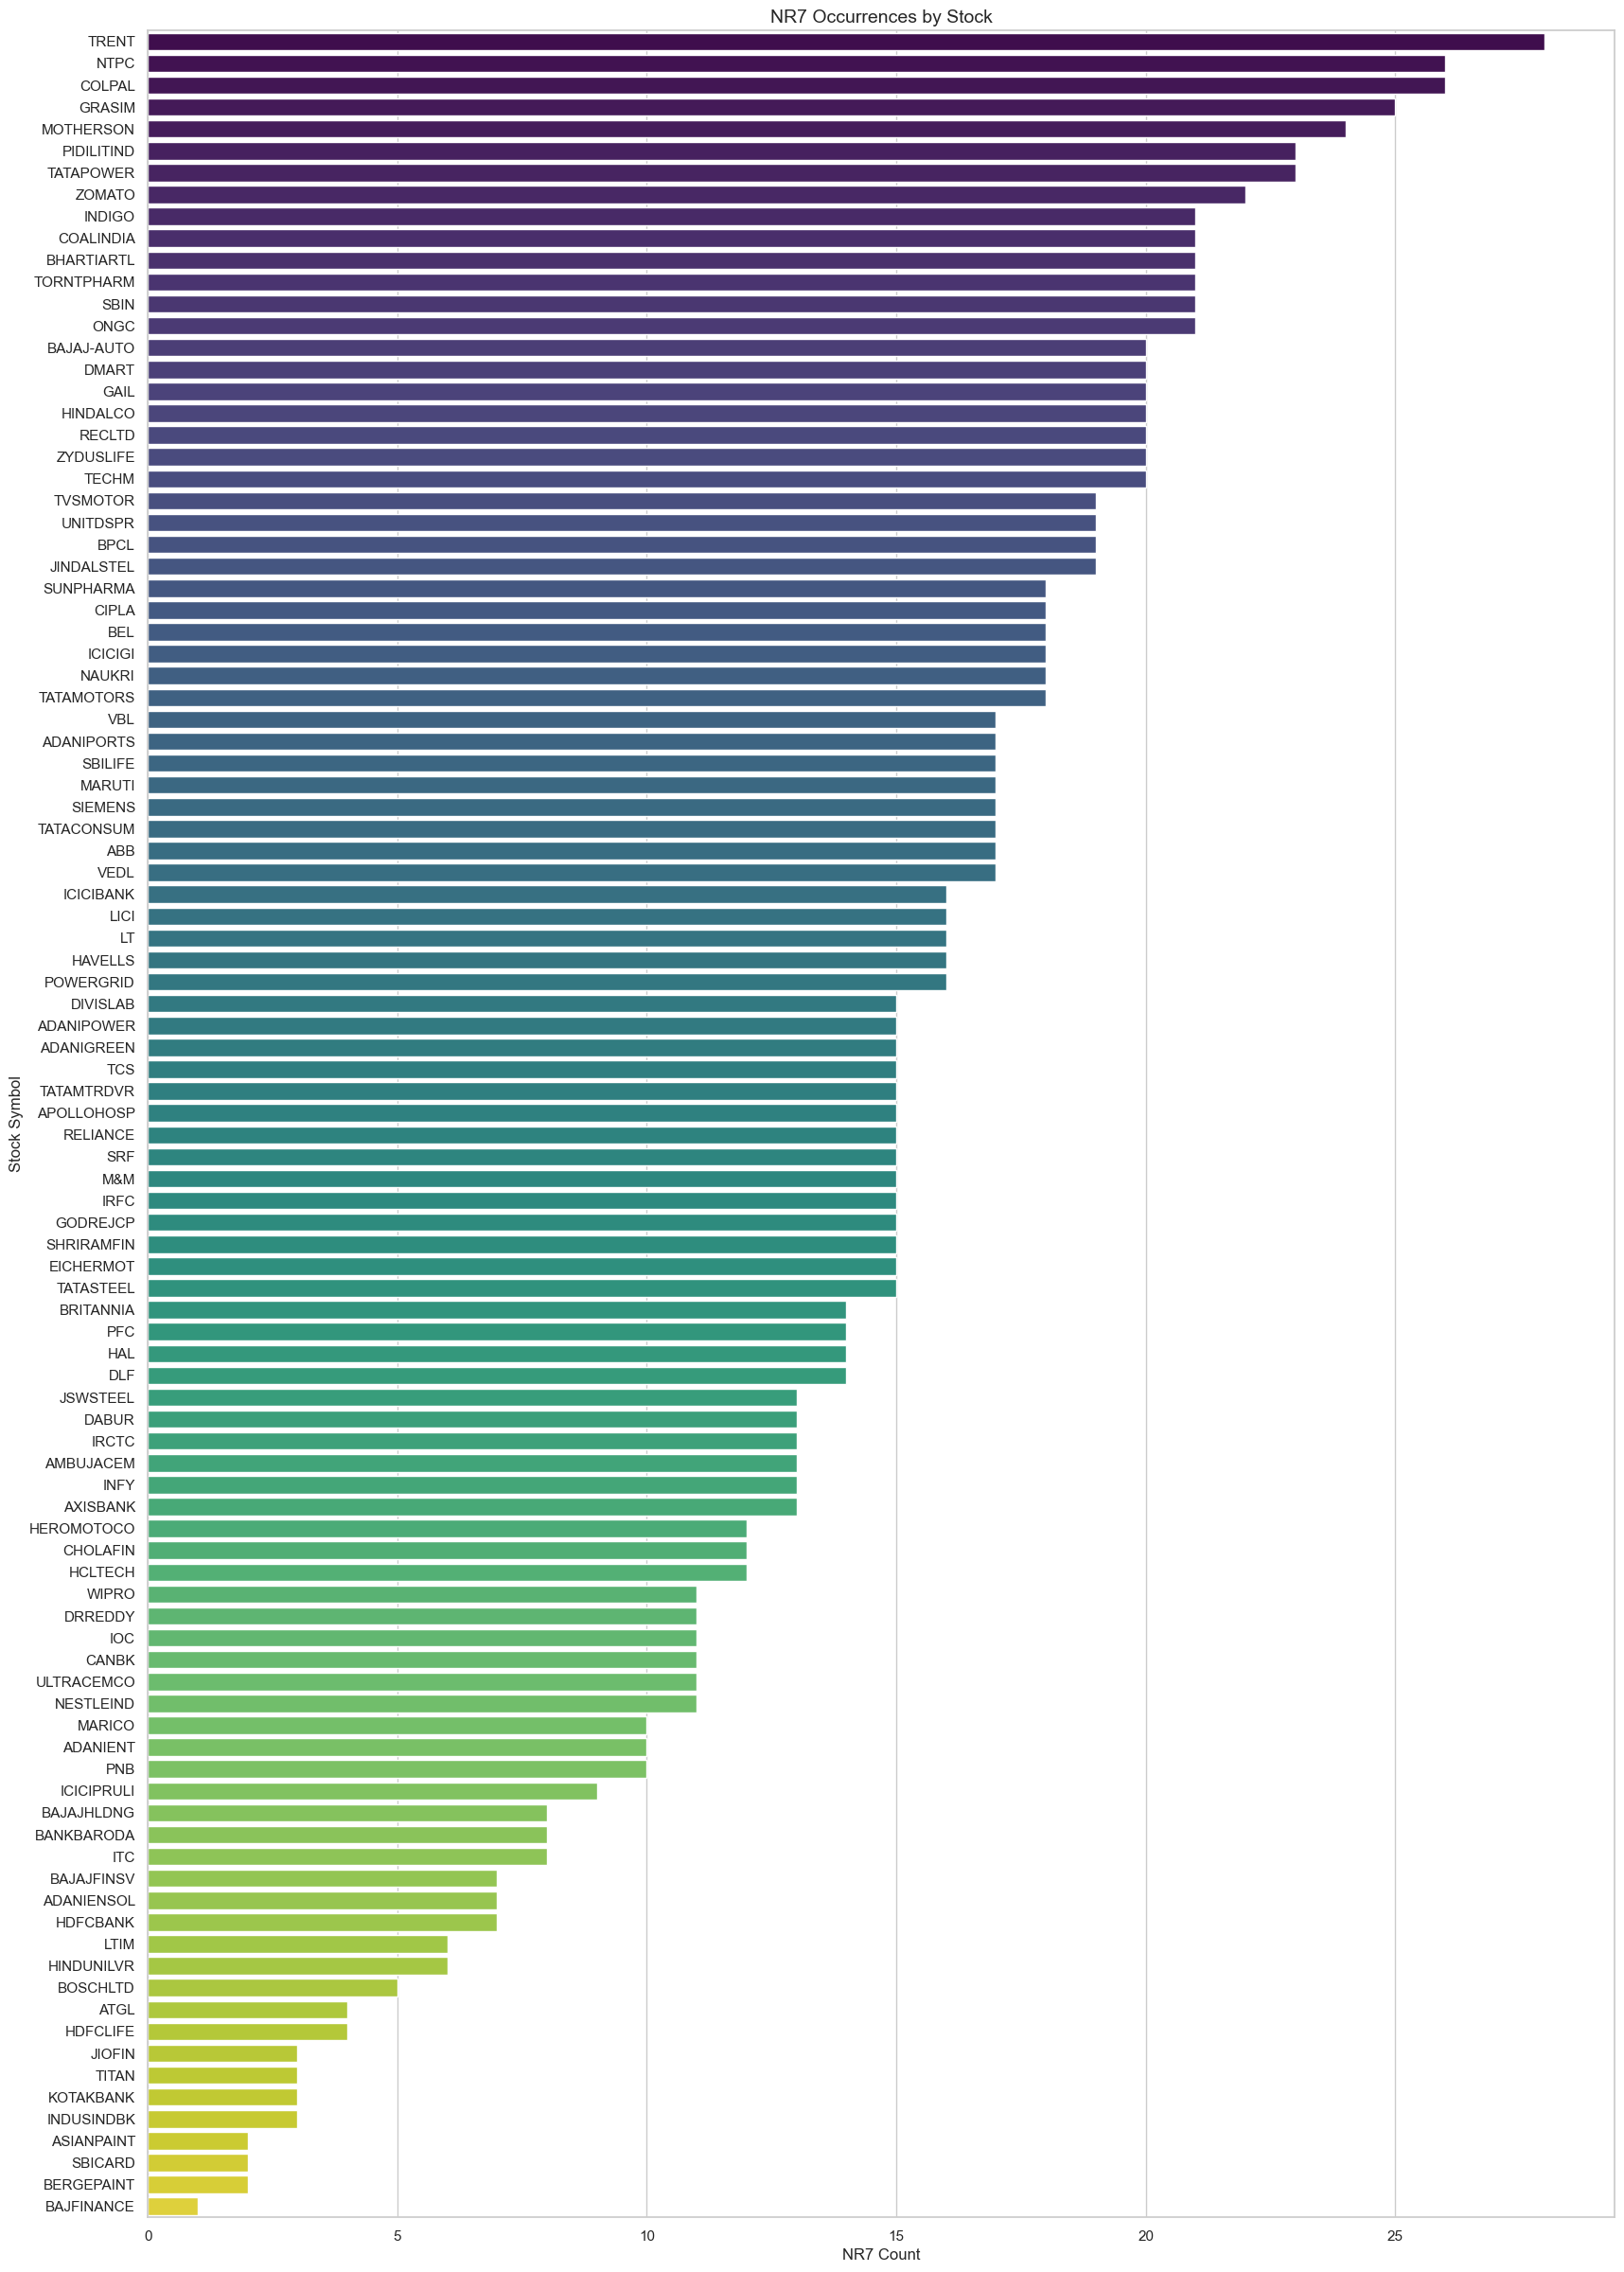

In [53]:
stock_counts = nifty100_data['symbol'].value_counts().reset_index()
stock_counts.columns = ['symbol', 'nr7_count']
sns.set(style="whitegrid")
plt.figure(figsize=(20, 30))
sns.barplot(x='nr7_count', y='symbol', data=stock_counts, hue='symbol', palette='viridis', legend=False, dodge=False)

plt.title('NR7 Occurrences by Stock', fontsize=14)
plt.xlabel('NR7 Count', fontsize=12)
plt.ylabel('Stock Symbol', fontsize=12)
plt.show()

In [54]:
stock_counts['relative_frequency'] = (stock_counts['nr7_count'] / stock_counts['nr7_count'].sum()) * 100
stock_counts

,symbol,nr7_count,relative_frequency
0,TRENT,28,1.948504
1,NTPC,26,1.809325
2,COLPAL,26,1.809325
3,GRASIM,25,1.739736
4,MOTHERSON,24,1.670146
...,...,...,...
95,INDUSINDBK,3,0.208768
96,ASIANPAINT,2,0.139179
97,SBICARD,2,0.139179
98,BERGEPAINT,2,0.139179


In [55]:
# Interactive chart as an HTML file
# Group by stock symbol and count occurrences of NR7 patterns
stock_counts = nifty100_data['symbol'].value_counts().reset_index()
stock_counts.columns = ['symbol', 'nr7_count']

# Create an interactive bar chart using Plotly
fig = px.bar(stock_counts,
             x='symbol',
             y='nr7_count',
             title='NR7 Occurrences by Stock',
             labels={'nr7_count': 'NR7 Count', 'symbol': 'Stock Symbol'},
             color='nr7_count',
             color_continuous_scale=px.colors.sequential.Viridis)

fig.show()
fig.write_html("nr7_occurrences_by_stock.html")

# Sector-wise Trend Analysis Insights(NIFTY100)

## Potential Insights to Extract:
1. **Dominant Sectors**: Identify sectors that frequently exhibit NR7 patterns. This could indicate consolidation phases in certain industries.

2. **Rare Sectors**: Spot sectors that rarely exhibit NR7 patterns, potentially indicating more volatile or trending stocks in those sectors.

3. **Sector Concentration**: Understand if certain industries (e.g., pharmaceuticals, IT, etc.) are more prone to showing consolidation periods.

4. **Sectoral Volatility**: High occurrences of NR7 in certain sectors may signal consolidation, which could be followed by significant moves (breakout or breakdown).

### Data Time Frame:
- Market data is from **February 9, 2024** to **October 1, 2024**.

In [56]:
import plotly.io as pio
# Group by sector and count occurrences
sector_counts = nifty100_data['sector'].value_counts().reset_index()
sector_counts.columns = ['sector', 'nr7_count']

# Create a bar chart
fig = px.bar(sector_counts, x= 'nr7_count', y='sector', orientation='h',
             title='Narrow Range 7 Occurrences by Sector(nifty100)',
             labels={'nr7_count': 'NR7 Count', 'sector': 'Sector'},
             color='nr7_count', color_continuous_scale='Viridis')  
fig.show()
# Save the plot as an HTML file and open it
pio.write_html(fig, file="nr7_nifty100_sector_wise.html", auto_open=True)

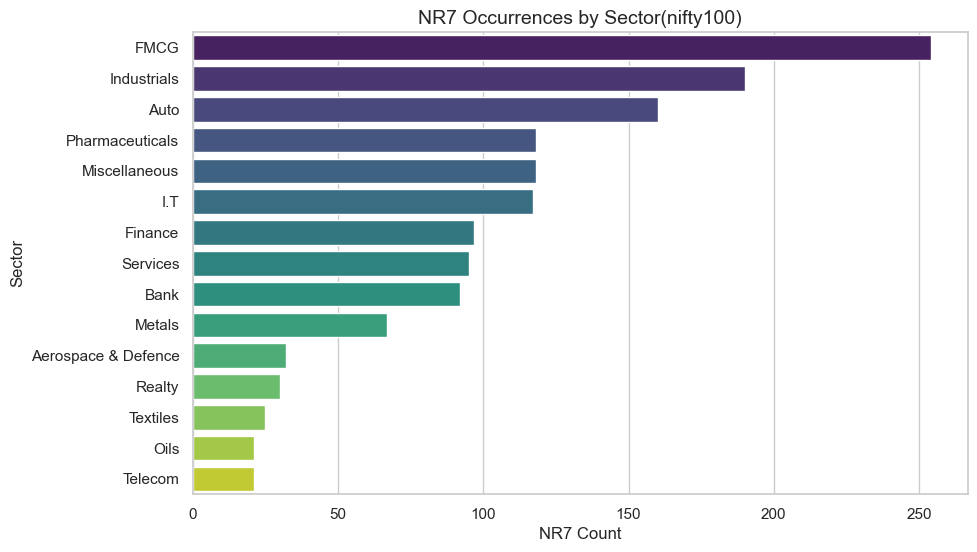

In [57]:
# Group by sector and count occurrences
sector_counts = nifty100_data['sector'].value_counts().reset_index()
sector_counts.columns = ['sector', 'nr7_count']

# Set the style
sns.set(style="whitegrid")

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x='nr7_count',
    y='sector',
    data=sector_counts,
    hue= 'sector',
    palette='viridis',
    dodge=False,
    legend=False   
)

plt.title('NR7 Occurrences by Sector(nifty100)', fontsize=14)
plt.xlabel('NR7 Count', fontsize=12)
plt.ylabel('Sector', fontsize=12)
plt.show()

In [58]:
sector_counts['relative_frequency'] = (sector_counts['nr7_count'] / sector_counts['nr7_count'].sum()) * 100
print(sector_counts)

                 sector  nr7_count  relative_frequency
0                  FMCG        254           17.675713
1           Industrials        190           13.221990
2                  Auto        160           11.134308
3       Pharmaceuticals        118            8.211552
4         Miscellaneous        118            8.211552
5                   I.T        117            8.141962
6               Finance         97            6.750174
7              Services         95            6.610995
8                  Bank         92            6.402227
9                Metals         67            4.662491
10  Aerospace & Defence         32            2.226862
11               Realty         30            2.087683
12             Textiles         25            1.739736
13                 Oils         21            1.461378
14              Telecom         21            1.461378


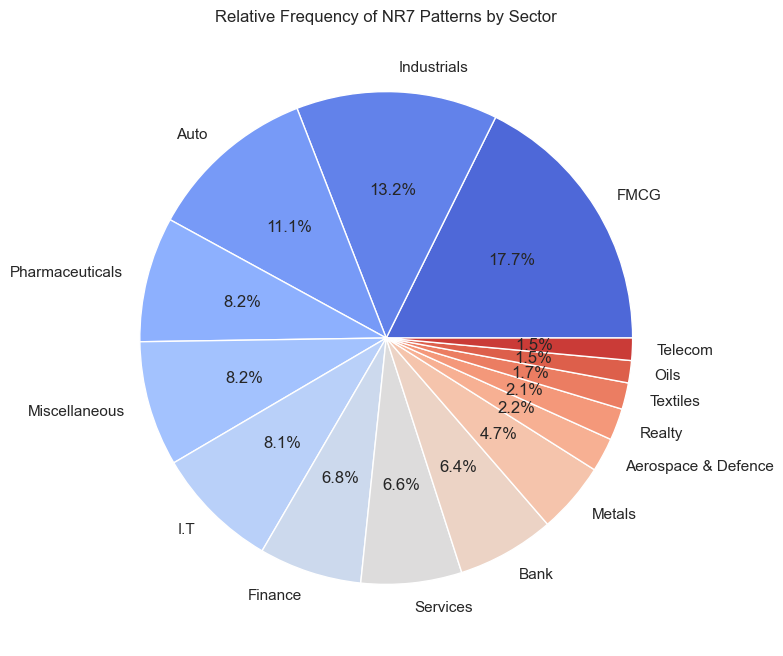

In [59]:
plt.figure(figsize=(8, 8))
plt.pie(sector_counts['relative_frequency'], labels=sector_counts['sector'], autopct='%1.1f%%', colors=sns.color_palette('coolwarm', len(sector_counts)))
plt.title('Relative Frequency of NR7 Patterns by Sector')
plt.show()


## Findings from Sector-wise Trend Analysis

1. **Dominant Sectors**:
- Based on the NR7 occurrences, the following sectors exhibit a higher frequency of consolidation patterns: *"FMGC: 254, Industrials: 190"*
- This suggests that these sectors may be in a consolidation phase, making them potential candidates for future breakouts.

2. **Rare Sectors**:
- The sectors that have fewer NR7 occurrences include: *"Textiles: 25, Oils: 21, Telecom: 21"*


NR7 Alone is Insufficient: Relying solely on NR7 occurrences for investment decisions is highly risky. Market context, fundamental analysis, economic indicators, and other technical indicators are crucial for confirmation.

Correlation ≠ Causation: While NR7 concentration might suggest consolidation, it doesn't guarantee breakouts. Other factors could be driving the price action.